In [1]:

import pandas as pd
import numpy as np

import folium
import io
import os

import pathlib

import requests
import seaborn as sns
import scipy.odr as odr
import statsmodels.api as sm

import scipy
import scipy.optimize as op
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import stats

#from pandas.stats.api import ols
from datetime import date, timedelta
import datetime

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.optimize import curve_fit

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
rcParams['pdf.fonttype'] = 42
inline_rc = dict(plt.rcParams)

#from matplotlib.pyplot import cm 
import platform
import sys
import glob
import time
import folium
import random
import pymannkendall as mk
#import windrose
#from windrose import WindroseAxes

import geopandas as gpd
#import geemap

from functools import reduce

from contextlib import closing
import csv

import pyproj
from pyproj import Proj

import math
#import ee

import refet
import pathlib

#import spotpy
#import simplekml

In [2]:
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(mpl.__version__))
#print("Well Application Version " + str(wa.__version__))
print("Scipy Version " +str(scipy.__version__))



Operating System Darwin 25.0.0
Python Version 3.13.7 (main, Sep 18 2025, 22:52:34) [Clang 20.1.4 ]
Pandas Version 2.3.3
Numpy Version 2.3.4
Matplotlib Version 3.10.7
Scipy Version 1.16.2


In [3]:
sys.path.append("../src")
import cottonwood
from cottonwood import (
    compile_weather_stations,
    export_to_excel,
    export_stations_gpkg
)

In [4]:
from dotenv import load_dotenv
import os

load_dotenv()  # reads .env in current dir
api_key = os.getenv("UCC_API")


In [5]:
agmet_stations = cottonwood.ucc_list_stations(api_key=api_key,
                                              network="UAGRIMET")
agmet_stations

,station_id,name,latitude,longitude,elevation,state,country,primary_id,network,source
0,1266813,CastleValley,38.64787,-109.398964,4527,UT,US,CSVU,UAGRIMET,UCC
1,1266816,Cokeville,42.07795,-110.95624,6194,WY,US,CKVY,UAGRIMET,UCC
2,1266801,Downey,42.43355,-112.12929,4865,ID,US,DWNI,UAGRIMET,UCC
3,1266800,Duchesne,40.18067,-110.36015,5453,UT,US,DUCU,UAGRIMET,UCC
4,1266805,Elmo,39.421265,-110.83798,5619,UT,US,ELMU,UAGRIMET,UCC
5,1266817,Evanston,41.19713,-111.02937,6824,WY,US,EVTY,UAGRIMET,UCC
6,1266807,Ferron,39.075554,-111.15426,6021,UT,US,FRNU,UAGRIMET,UCC
7,1266810,Grantsville,40.531094,-112.75661,4365,UT,US,GRTU,UAGRIMET,UCC
8,1266806,Huntington,39.30698,-110.97652,5763,UT,US,HNTU,UAGRIMET,UCC
9,1266812,Monroe,38.634106,-112.157646,5272,UT,US,MNRU,UAGRIMET,UCC


In [6]:
stat_ids = list(agmet_stations[agmet_stations['name'].isin(["Elmo", "Ferron", "Orangeville", "Huntington"])]['station_id'])
stat_ids = [str(i) for i in stat_ids]

In [7]:
cottonwood.ucc_get_daily(api_key=api_key,
                         station_ids=stat_ids,
                         start=pd.to_datetime("2020-01-01"),
                         end=pd.to_datetime("2025-10-01"),
                         )

Fetched station_id=1266805 for 2020-01-01 to 2022-12-31, 1093 rows.
Fetched station_id=1266805 for 2023-01-01 to 2025-10-01, 1002 rows.
Fetched station_id=1266807 for 2020-01-01 to 2022-12-31, 1092 rows.
Fetched station_id=1266807 for 2023-01-01 to 2025-10-01, 1002 rows.
Fetched station_id=1266806 for 2020-01-01 to 2022-12-31, 1093 rows.
Fetched station_id=1266806 for 2023-01-01 to 2025-10-01, 1002 rows.
Fetched station_id=1266804 for 2020-01-01 to 2022-12-31, 1093 rows.
Fetched station_id=1266804 for 2023-01-01 to 2025-10-01, 1002 rows.


,date_time,station_id,eto,etr,ea_avg,precip,rh_max,rh_min,td_avg,td_max,...,airt_max,airt_min,lwpctwet,solar_mj,windd_avg,winds_avg,winds_max,precip_accum,site_pressure,sealevel_pressure
0,2020-01-01 23:59:59,1266804,0.015781,0.017160,0.2814,0.11,92,57,13.36,17.92,...,28.73,9.15,None,6.78,185,2.1,12.5,8.66,None,None
1,2020-01-02 23:59:59,1266804,0.029060,0.033709,0.2841,0.00,91,43,13.67,21.57,...,34.28,6.73,None,9.83,219,2.7,14.3,8.72,None,None
2,2020-01-03 23:59:59,1266804,0.022638,0.025081,0.2571,0.00,93,60,11.31,17.06,...,27.88,7.32,None,9.76,214,2.1,9.4,8.72,None,None
3,2020-01-04 23:59:59,1266804,0.019137,0.019812,0.2521,0.00,93,55,10.77,22.23,...,32.84,4.94,None,8.00,207,1.4,6.4,8.73,None,None
4,2020-01-05 23:59:59,1266804,0.022633,0.024327,0.2482,0.00,92,64,10.24,19.01,...,28.77,0.43,None,9.92,194,1.9,9.4,8.73,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,2025-09-26 23:59:59,1266807,0.160482,0.204689,0.8169,0.00,68,24,39.24,47.11,...,77.38,52.41,0,17.27,199,4.6,14.8,11.39,81.74,101.90
8375,2025-09-27 23:59:59,1266807,0.139990,0.179872,0.9731,0.11,87,28,43.41,55.68,...,76.68,54.62,13,13.26,207,6.6,31.9,11.50,81.80,101.95
8376,2025-09-28 23:59:59,1266807,0.056943,0.064854,1.2131,0.18,95,60,49.67,53.71,...,64.24,49.15,49,9.13,217,2.7,20.0,11.69,81.96,102.11
8377,2025-09-29 23:59:59,1266807,0.122782,0.145829,1.0821,0.00,91,41,46.59,52.78,...,69.75,48.01,0,16.90,210,3.9,12.5,11.69,81.94,102.10


In [11]:
sys.path.append("../src")

from cottonwood import (
    compile_weather_stations,
    export_to_excel,
    export_stations_gpkg
)
from dotenv import load_dotenv
import os

load_dotenv()  # reads .env in current dir
api_key = os.getenv("UCC_API")


result = compile_weather_stations(
    api_key=api_key,
    study_station_names=["Elmo", "Ferron", "Orangeville", "Huntington"],
    ucc_network="UAGRIMET",
    ucc_daily_range=("2016-01-01", "2020-12-31"),
    snotel_map={
        714: ("UT","Red Pine Ridge"),
        612: ("UT","Mammoth-Cottonwood"),
        # ...
    },
    mesowest_dir="/path/to/Mesowest"
)

export_to_excel("climate_data.xlsx",
    ucc_stations=result["ucc_stations"],
    ucc_daily=result["ucc_daily"],
    snotel_daily=result["snotel_daily"],
    mesowest_meta=result["mesowest_meta"],
    station_catalog=result["station_catalog"],
)
export_stations_gpkg("station_info.gpkg", result["station_catalog"])


HTTPError: 404 Client Error: Not Found for url: https://climate.usu.edu/API/api.php/v3/key=myR49SmUMATJtwIlstKqoIJotloOem/station_id=1266805/get_daily/start_date=2016-01-01/end_date=2018-12-31/units=e

# UCC API

Pull climate station data from the UCC using their API.

## Station Information

The following script pulls all agrimet stations in Utah, converts the results to a Geodataframe, then selects a subset from that dataset.

In [24]:
version_no = "v3"
api_key = dbconnect.get_ucc_api()
source = "UCC"
network = "UAGRIMET"
#ucc_url = f"https://climate.usu.edu/API/api.php/{version_no}/key={api_key}/station_search/source={source}/network={network}"
ucc_url = f"https://climate.usu.edu/API/api.php/{version_no}/key={api_key}/station_search/network={network}"

resp = requests.get(ucc_url)

if resp.json()['success']:
    stations = pd.DataFrame(resp.json()['payload'])
stations['station_id'] = stations['station_id'].astype(int)
stations = stations.set_index('station_id')

gdf = gpd.GeoDataFrame(stations, geometry = gpd.points_from_xy(stations.longitude, stations.latitude),crs='epsg:4326')
studystats = gdf[gdf['name'].isin(['Elmo','Ferron','Orangeville','Huntington'])]
studystats = studystats.drop(['state','country','source'],axis=1)
stat_dict = studystats.reset_index().set_index('primary_id')['station_id'].to_dict()



In [25]:
studystats

,name,latitude,longitude,elevation,primary_id,network,geometry
station_id,,,,,,,
1266805,Elmo,39.421265,-110.83798,5619,ELMU,UAGRIMET,POINT (-110.83798 39.42126)
1266807,Ferron,39.075554,-111.15426,6021,FRNU,UAGRIMET,POINT (-111.15426 39.07555)
1266806,Huntington,39.30698,-110.97652,5763,HNTU,UAGRIMET,POINT (-110.97652 39.30698)
1266804,Orangeville,39.22013,-111.07003,5645,CSDU,UAGRIMET,POINT (-111.07003 39.22013)


In [17]:
units = "e"

for station_id in studystats.index.unique():
    for year in pd.date_range(start='2016',end='2020-10-01',freq='3YS'):
        start_date = year
        end_date = pd.to_datetime(f"{year.year+2}-12-31")
        stat_url = ucc_url + f"/station_id={station_id}/get_daily/start_date={start_date:%Y-%m-%d}/end_date={end_date:%Y-%m-%d}/units={units}"
        print(start_date,end_date)
        pd.read

2016
2016-01-01 00:00:00 2018-12-31 00:00:00
2019
2019-01-01 00:00:00 2021-12-31 00:00:00
2022
2022-01-01 00:00:00 2024-12-31 00:00:00


In [22]:
start_date.day

1

In [14]:
station_id = 1266805	

st_dc = {}

for year in pd.date_range(start='2016',end='2020-10-01',freq='3YS'):
    start_date = year
    end_date = pd.to_datetime(f"{year.year+2}-12-31")
    ed_yr = end_date.year

    stat_url = ucc_url + f"/station_id={station_id}/get_daily/start_date={start_date.year}-1-1/end_date={end_date.year}-12-31/units={units}"
    print(stat_url)
    resp = requests.get(stat_url)
    
    if resp.json()['success']:
        df = pd.DataFrame(resp.json()['payload'])
        df['date_time'] = pd.to_datetime(df['date_time'])
        st_dc[f"{start_date.year}"]


NameError: name 'ucc_url' is not defined

In [30]:
df

,date_time,station_id,eto,etr,ea_avg,precip,rh_max,rh_min,td_avg,td_max,...,airt_max,airt_min,lwpctwet,solar_mj,windd_avg,winds_avg,winds_max,precip_accum,site_pressure,sealevel_pressure
0,2019-01-01 23:59:59,1266805,0.034581,0.047792,0.1345,0.00,74,28,-2.65,1.46,...,28.43,-1.78,None,9.56,234,5.9,21.5,8.12,None,None
1,2019-01-02 23:59:59,1266805,0.026712,0.032128,0.1328,0.00,75,27,-3.24,1.97,...,28.47,-4.95,None,9.63,254,2.3,7.5,8.15,None,None
2,2019-01-03 23:59:59,1266805,0.028217,0.034139,0.1808,0.00,80,35,3.41,9.53,...,31.69,1.67,None,9.42,248,2.3,7.9,8.14,None,None
3,2019-01-04 23:59:59,1266805,0.031256,0.037976,0.2044,0.00,82,33,6.17,10.59,...,35.74,4.31,None,9.50,249,2.4,7.2,8.14,None,None
4,2019-01-05 23:59:59,1266805,0.019151,0.022737,0.2461,0.00,86,50,9.72,19.08,...,28.96,2.47,None,5.09,225,1.9,6.6,8.13,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2021-12-26 23:59:59,1266805,0.028051,0.040786,0.3555,0.00,95,45,18.28,28.76,...,32.64,9.94,None,7.80,243,7.5,36.2,6.16,None,None
1089,2021-12-27 23:59:59,1266805,0.026659,0.031406,0.2706,0.04,94,53,11.76,22.83,...,30.70,1.78,None,8.99,233,4.1,21.5,6.22,None,None
1090,2021-12-28 23:59:59,1266805,0.017475,0.020249,0.2595,0.00,92,59,11.48,18.28,...,28.87,1.64,None,6.35,252,2.7,11.0,6.21,None,None
1091,2021-12-29 23:59:59,1266805,0.024892,0.028021,0.2461,0.05,92,56,10.06,16.78,...,29.34,-0.28,None,8.81,227,2.1,6.8,6.24,None,None


## Pull AGRIMET Station Data

In [7]:
studystats.loc[stat_dict.get(st_abb),'latitude']

NameError: name 'st_abb' is not defined

In [64]:
import pathlib
import pandas as pd

ag_st_files = pathlib.Path(r"G:\Shared drives\UGS_Groundwater\Projects\Eddy_Covariance\Data_Processing\Jupyter_Notebooks\Cottonwood\data\UAGRIMET")

hr_data={}
dy_data={}

for file in ag_st_files.glob("*/*report.csv"):
    print(file.name)
    df = pd.read_csv(file,nrows=11,usecols=[0,1],skiprows=[0,1,5,6,13,14] ,header=None,names=['field', 'description'])
    meta = df.T.loc['description']
    st_abb = meta[1]

    if "dly" in file.name:
        data = pd.read_csv(file,skiprows=19,na_values=['M','T'],parse_dates=True,index_col='date_time')

        dly = refet.Daily(tmin = data['airt_min'].values, tmax = data['airt_max'], rs = data['solarmj'], uz = data['winds_avg'], zw = 3, 
                          elev = float(studystats.loc[stat_dict.get(st_abb),'elevation']),
                          lat = float(studystats.loc[stat_dict.get(st_abb),'latitude']),
                          doy = data.index.day_of_year,
                          ea=data['ea_avg'], method='asce', input_units={'tmin': 'F','tmax': 'F', 'uz': 'mph', 'lat': 'deg','ea':'kPa'})
        data['eto_asce'] = dly.eto()*0.0393701 #mm to in
        data['etr_asce'] = dly.etr()*0.0393701 #mm to in
        dy_data[stat_dict.get(st_abb)] = data

    else:
        data = pd.read_csv(file,skiprows=19,na_values=['M','T'],parse_dates=True,index_col='date_time')
        hrly = refet.Hourly(tmean = data['airt_avg'], rs = data['solarmj'], uz = data['winds_avg'], zw = 3, 
                          elev = float(studystats.loc[stat_dict.get(st_abb),'elevation']),
                          lat = float(studystats.loc[stat_dict.get(st_abb),'latitude']),
                         lon = float(studystats.loc[stat_dict.get(st_abb),'longitude']),
                          doy = data.index.day_of_year,
                            time = data.index.hour, 
                          ea=data['ea_avg'], method='asce', input_units={'tmean': 'F', 'uz': 'mph', 'lat': 'deg','lon': 'deg','ea':'kPa',})
        data['eto_asce'] = hrly.eto()*0.0393701 #mm to in
        data['etr_asce'] = hrly.etr()*0.0393701 #mm to in
        hr_data[stat_dict.get(st_abb)] = data
    
agrimet_hrly = pd.concat(hr_data)
agrimet_dly = pd.concat(dy_data)

agrimet_hrly.to_parquet('agrimet_hrly.parquet')
agrimet_dly.to_parquet('agrimet_dly.parquet')

hly-report.csv
dly-report.csv
hly-report.csv
dly-report.csv
hly-report.csv
dly-report.csv
hly-report.csv
dly-report.csv


Leverages the USU UCC API

In [57]:
#network = "UAGRIMET"
#data = {}
#for stid in studystats.index.unique():
#    
#    yrdata = {}
#    for year in range(2018,2024):
#    
#        stdt = pd.to_datetime(f'{year}-01-01')
#        enddt = stdt + pd.offsets.DateOffset(years=1,months=7)
#        data_url = f"https://climate.usu.edu/API/api.php/v3/key={api_key}/station_search/network={network}/station_id={stid}/get_hourly/start_date={stdt:%Y-%m-%d}/end_date={enddt:%Y-%m-%d}/units=e"
#        resp = requests.get(data_url)
#        if resp.json()['success']:
#            yrdata[year] = pd.DataFrame(resp.json()['payload'])
#        time.sleep(random.randint(2,7))
#    data[stid] = pd.concat(yrdata)
#    print(stid)
#agstationdata = pd.concat(data).reset_index().drop(['level_0','level_1','level_2'],axis=1)
#agstationdata['date_time'] = pd.to_datetime(agstationdata['date_time'])
#agstationdata['station_id'] = agstationdata['station_id'].astype(int)
#agstationdata = agstationdata.set_index(['station_id','date_time'])
#for col in agstationdata.columns:
#    agstationdata[col] = pd.to_numeric(agstationdata[col])
#ag_data = {}

#for st_id in agstationdata.index.get_level_values(0).unique():
#    stat_data = agstationdata.loc[st_id].copy()
#    data_len = len(stat_data)
#    tm = stat_data['airt_avg'].values
#    ea = stat_data['ea_avg'].values
#    rs = stat_data['rso'].values
#    uz =  stat_data['winds_avg'].values
#    zw = [3]*len(stat_data)
#    doy = stat_data.index.day_of_year
#    hr = stat_data.index.hour
#    lat = [float(studystats.loc[st_id,'latitude'])]*data_len
#    longit = [float(studystats.loc[st_id,'longitude'])]*data_len
#    elev = [float(studystats.loc[st_id,'elevation'])]*data_len
#    hrly = refet.Hourly(
#        tmean=tm, ea=ea, rs=rs, uz=uz, zw=3, elev=elev,
#        lat=lat, lon=longit, doy=doy, time=hr, method='asce',
#        input_units={'tmean': 'F', 'uz': 'mph', 'lat': 'deg','lon': 'deg','ea':'kPa',}
#        )
#    stat_data['eto_asce'] = hrly.eto()*0.0393701 #mm to in
#    stat_data['etr_asce'] = hrly.etr()*0.0393701 #mm to in
#    ag_data[st_id] = stat_data

1266805
1266807
1266806
1266804


<Axes: xlabel='None,date_time'>

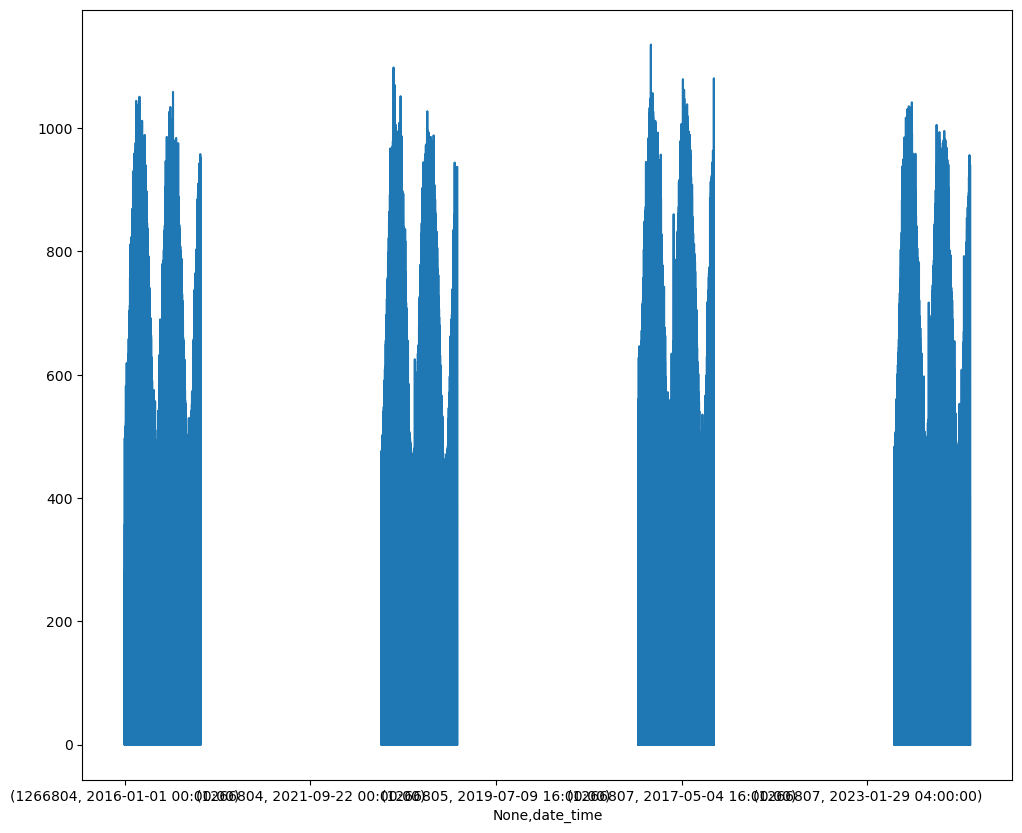

In [63]:
agrimet_hrly['solarmj'].plot()

In [74]:
agstdata = pd.concat(ag_data)
#agstdata = agstdata.set_index(['station_id','date_time'])
agstdata

eto       etr       rso  solar  ea_avg  \
        date_time                                                          
1266805 2016-01-01 00:00:00 -0.001000 -0.001000       NaN    0.0  0.0840   
        2016-01-01 01:00:00 -0.001000 -0.001000       NaN    0.0  0.0918   
        2016-01-01 02:00:00 -0.005000 -0.006000       NaN    0.0     NaN   
        2016-01-01 03:00:00 -0.002000 -0.002000       NaN    0.0  0.0883   
        2016-01-01 04:00:00  0.000000  0.000000       NaN    0.0  0.0718   
...                               ...       ...       ...    ...     ...   
1266804 2023-11-24 06:00:00 -0.000215 -0.000343  0.000001    0.0  0.5508   
        2023-11-24 07:00:00 -0.000255 -0.000353  0.029798    4.4  0.5787   
        2023-11-24 08:00:00  0.000419  0.000447  0.387990   42.3  0.5983   
        2023-11-24 09:00:00  0.001254  0.001337  0.963804   72.8  0.5993   
        2023-11-24 10:00:00  0.000439  0.000469  0.321338   98.3  0.5990   

                             precip  rh_max  rh_min  td_avg  td_max  ...  \
        date_time                                                    ...   
1266805 2016-01-01 00:00:00     NaN    68.0    62.0  -11.67  -11.67  ...   
        2016-01-01 01:00:00     NaN    69.0    58.0  -10.51   -9.18  ...   
        2016-01-01 02:00:00     NaN    69.0    56.0   -9.55   -8.18  ...   
        2016-01-01 03:00:00     NaN    67.0    55.0  -11.13   -9.79  ...   
        2016-01-01 04:00:00     NaN    67.0    61.0  -15.09  -14.63  ...   
...                             ...     ...     ...     ...     ...  ...   
1266804 2023-11-24 06:00:00   0.000    98.0    97.0   29.45   30.50  ...   
        2023-11-24 07:00:00   0.000    98.0    97.0   30.68   30.96  ...   
        2023-11-24 08:00:00   0.045    98.0    97.0   31.48   32.40  ...   
        2023-11-24 09:00:00   0.007    97.0    96.0   31.54   32.25  ...   
        2023-11-24 10:00:00   0.012    96.0    96.0   31.52   31.73  ...   

                             lwpctwet  solar_mj  windd_avg  winds_avg  \
        date_time                                                       
1266805 2016-01-01 00:00:00       NaN       NaN      257.0        2.1   
        2016-01-01 01:00:00       NaN       NaN      280.0        2.8   
        2016-01-01 02:00:00       NaN       NaN      261.0        1.5   
        2016-01-01 03:00:00       NaN       NaN      292.0        2.4   
        2016-01-01 04:00:00       NaN       NaN      307.0        3.9   
...                               ...       ...        ...        ...   
1266804 2023-11-24 06:00:00       0.0    0.0000        0.0        0.0   
        2023-11-24 07:00:00       0.0    0.0158        0.0        0.0   
        2023-11-24 08:00:00      72.0    0.1522        0.0        0.0   
        2023-11-24 09:00:00     100.0    0.2620        0.0        0.0   
        2023-11-24 10:00:00     100.0    0.0885       37.0        0.5   

                             winds_max  precip_accum  site_pressure  \
        date_time                                                     
1266805 2016-01-01 00:00:00        4.4         17.12            NaN   
        2016-01-01 01:00:00        4.4         17.13            NaN   
        2016-01-01 02:00:00        4.2         17.14            NaN   
        2016-01-01 03:00:00        6.8         17.14            NaN   
        2016-01-01 04:00:00        5.9         17.14            NaN   
...                                ...           ...            ...   
1266804 2023-11-24 06:00:00        0.0          6.39          81.20   
        2023-11-24 07:00:00        0.0          6.41          81.22   
        2023-11-24 08:00:00        0.0          6.41          81.24   
        2023-11-24 09:00:00        0.0          6.41          81.25   
        2023-11-24 10:00:00        2.1          6.43          81.26   

                             sealevel_pressure  eto_asce  etr_asce  
        date_time                                                   
1266805 2016-01-01 00:00:00                N

In [75]:
agstdata.to_parquet('agstdata.parquet')

Save dataset

In [7]:
agstationdata.to_csv('agstationdata.csv')
agstationdata.reset_index().to_feather('agstationdata.feather')
agstationdata.to_parquet('agstationdata.parquet')

# MESOWEST

Mesowest has an API, but it is limited and they want to charge money, so I just downloaded the data.

## Mesowest Stations

In [112]:
float(df.loc[2,'description'])
float(df.loc[3,'description'])

39.21345

,field,description
0,# STATION,PC351
1,# STATION NAME,North Horn
2,# LATITUDE,39.21345
3,# LONGITUDE,-111.15617


In [114]:
mesopath = pathlib.Path(r"G:\Shared drives\UGS_Groundwater\Projects\Eddy_Covariance\GIS\Cottonwood\weather_station_data\Mesowest")
dfs = {}

root = "https://epqs.nationalmap.gov/v1/json?"

for file in mesopath.glob("*"):
    print(file.name)
    df = pd.read_csv(file,nrows=4,delimiter=":",header=None,names=['field', 'description'])

    args = {'x':float(df.loc[3,'description']),
            'y':float(df.loc[2,'description']),
            'wkid':4326,
            'units':'Meters',
            'includeDate':'false'}
    
    resp = requests.get(root,args)
    elev = float(resp.json()['value'])

    df.loc[4,'description'] = elev
    
    dfs[file.name] = df.T.loc['description']

    time.sleep(random.randint(1,5))

mesostations =  pd.concat(dfs).unstack(-1).rename(columns={0:'primary_id',
                                                           1:'name',
                                                           2:'latitude',
                                                           3:'longitude',
                                                           4:'elevation'
                                                          }).drop_duplicates()

mesostations['station_id'] = range(1,6)
mesostations['network'] = 'mesowest'
mesostations = gpd.GeoDataFrame(mesostations, geometry = gpd.points_from_xy(mesostations.longitude, mesostations.latitude),crs='epsg:4326')

mesostations = mesostations.drop_duplicates(subset='primary_id').reset_index().set_index('primary_id').drop(['index'],axis=1)
mesostations.index = mesostations.index.str.strip()
mesostations

PC154.csv
PC154 (1).csv
JVAU1.csv
PC351.csv
JVAU1 (8).csv
JVAU1 (7).csv
JVAU1 (6).csv
JVAU1 (5).csv
JVAU1 (4).csv
JVAU1 (3).csv
JVAU1 (2).csv
JVAU1 (1).csv
E7368.csv
E7368 (1).csv
E7368 (2).csv
E7368 (3).csv
JVAU1 (9).csv
PC154 (9).csv
PC351 (11).csv


,primary_id,name,latitude,longitude,elevation,station_id,network,geometry
PC154.csv,PC154,Bear Valley Canyon,39.39874,-111.11027,2057.589844,1,mesowest,POINT (-111.11027 39.39874)
JVAU1.csv,JVAU1,JOES VALLEY,39.309444,-111.322778,2655.102295,2,mesowest,POINT (-111.32278 39.30944)
PC351.csv,PC351,North Horn,39.21345,-111.15617,2602.800049,3,mesowest,POINT (-111.15617 39.21345)
E7368.csv,E7368,EW7368 Castle Dale,39.22683,-111.01900,1776.915649,4,mesowest,POINT (-111.01900 39.22683)
JVAU1 (9).csv,JVAU1,JOES VALLEY,39.309440,-111.322780,2655.102295,5,mesowest,POINT (-111.32278 39.30944)


## Mesowest Data

In [90]:
mesopath = pathlib.Path(r"G:\Shared drives\UGS_Groundwater\Projects\Eddy_Covariance\GIS\Cottonwood\weather_station_data\Mesowest")
dfs = {}
data_dfs = {}
for file in mesopath.glob("*"):
    print(file.name)
    df = pd.read_csv(file,nrows=4,delimiter=":",header=None,names=['field', 'description'])
    df['field'] = df['field'].str.replace("# "," ").str.strip()
    dfs[file.name] = df.T.loc['description']

    df2 = pd.read_csv(file,comment="#")
    df2 = df2.dropna(subset=['Station_ID'])
    for col in df2.columns:
        if col not in ['wind_cardinal_direction_set_1d','Station_ID','Date_Time']:
            df2[col] = pd.to_numeric(df2[col])
        elif col == 'Date_Time':
            #df2[col] = df2[col].astype(str).apply(lambda x: x[:-4],1)
            df2[col] = df2[col].str.slice(stop=-4)
            df2[col] = pd.to_datetime(df2[col], format="%m/%d/%Y %H:%M")
            
        if "_set_1d" in col:
            df2 = df2.rename(columns={col:col.replace("_set_1d","")})
        elif "_set_1" in col: 
            df2 = df2.rename(columns={col:col.replace("_set_1","")})
    
    data_dfs[file.name] = df2

mesodata = pd.concat(data_dfs)

#mesodata.reset_index().to_feather('meso.feather')
#mesodata.to_parquet('meso.parquet')

PC154.csv
PC154 (1).csv
JVAU1.csv
PC351.csv
JVAU1 (8).csv
JVAU1 (7).csv
JVAU1 (6).csv
JVAU1 (5).csv
JVAU1 (4).csv
JVAU1 (3).csv
JVAU1 (2).csv
JVAU1 (1).csv
E7368.csv


C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_12424\667329053.py:10: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file,comment="#")


E7368 (1).csv


C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_12424\667329053.py:10: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file,comment="#")


E7368 (2).csv


C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_12424\667329053.py:10: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file,comment="#")


E7368 (3).csv


C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_12424\667329053.py:10: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file,comment="#")


JVAU1 (9).csv
PC154 (9).csv
PC351 (11).csv


In [152]:
meso_hr = mesodata.groupby(['Station_ID',pd.Grouper(key='Date_Time',freq='1H')]).mean(numeric_only=True)
meso_et = {}

for st_id in meso_hr.index.get_level_values(0).unique():
    df3 = meso_hr.loc[st_id].interpolate(method='time',limit=4).copy()
    data_len = len(df3)

    if len(df3['solar_radiation'].dropna()) > 0:
        kwargs = {'tmean': df3['air_temp'].values,
            'tdew':df3['dew_point_temperature'].values,
            'uz': df3['wind_speed'].values,
            'zw':3,
            'lat':[float(mesostations.loc[st_id,'latitude'])]*data_len,
            'lon':[float(mesostations.loc[st_id,'longitude'])]*data_len,
            'elev':[float(mesostations.loc[st_id,'elevation'])]*data_len,
            'doy': df3.index.day_of_year.values,
            'time':df3.index.hour.values,
              'rs':df3['solar_radiation'].values,
            'input_units':{'tmean': 'F', 'uz': 'mph', 'lat': 'deg','lon': 'deg','ea':'kPa','elev':'ft','tdew':'F'}}
        hrly = refet.Hourly(**kwargs)
        df3['eto_asce'] = hrly.eto()*0.0393701 #mm to in
        df3['etr_asce'] = hrly.etr()*0.0393701 #mm to in
        print(st_id)
    meso_et[st_id] = df3

E7368
JVAU1


# SNOTEL 

In [19]:
stations = {714:'Red Pine Ridge',
            612:'Mammoth-Cottonwood',
            1216:'Huntington Horse',
            1227:'Upper Joes Valley',
            742:'Seeley Creek',
            1222:'GBRC Meadows',
            1224:'Mt Baldy',
            371:'Buck Flat',
            1228:'Wrigley Creek'}

snotel_dfs = {}

for station in stations.keys():
    url_stub = f"https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customSingleStationReport/daily/start_of_period/{station}:UT:SNTL%7Cid=%22%22%7Cname/-2778,0/WTEQ::value,SNWD::value,PREC::value,TOBS::value,TMAX::value,TMIN::value,TAVG::value"
    snotel_dfs[station] = pd.read_csv(url_stub, parse_dates=True,comment='#')
    print(station)

714
612
1216
1227
742
1222
1224
371
1228


In [20]:
snotel_station_url = f"https://climate.usu.edu/API/api.php/v3/key={api_key}/station_search/external/network=snotel/stations/state=UT"
resp = requests.get(snotel_station_url)
if resp.json()['success']:
    snotel_stations = pd.DataFrame(resp.json()['payload'])
snotel_stations = snotel_stations[snotel_stations['name'].isin(list(stations.values()))]
snotel_stations['network'] = 'SNOTEL'
snotel_stations = gpd.GeoDataFrame(snotel_stations, geometry = gpd.points_from_xy(snotel_stations.longitude, snotel_stations.latitude),crs='epsg:4326')
snotel_stations

,station_id,primary_id,name,latitude,longitude,elevation,network,geometry
16,1294660,BUFU1,Buck Flat,39.134,-111.43722,9409,SNOTEL,POINT (-111.43722 39.13400)
47,1294691,GBMU1,GBRC Meadows,39.30229,-111.45383,9858,SNOTEL,POINT (-111.45383 39.30229)
60,1294704,HNHU1,Huntington Horse,39.61774,-111.30576,9652,SNOTEL,POINT (-111.30576 39.61774)
83,1294727,MCDU1,Mammoth-Cottonwood,39.68338,-111.31818,8709,SNOTEL,POINT (-111.31818 39.68338)
90,1294734,MTBU1,Mt Baldy,39.13648,-111.50527,9524,SNOTEL,POINT (-111.50527 39.13648)
100,1294744,RPRU1,Red Pine Ridge,39.45197,-111.27221,8988,SNOTEL,POINT (-111.27221 39.45197)
106,1294750,SEEU1,Seeley Creek,39.31042,-111.43297,9904,SNOTEL,POINT (-111.43297 39.31042)
124,1294768,UJVU1,Upper Joes Valley,39.4155,-111.2491,8596,SNOTEL,POINT (-111.24910 39.41550)
131,1294775,WRIU1,Wrigley Creek,39.13233,-111.35685,9327,SNOTEL,POINT (-111.35685 39.13233)


In [21]:
snotel = pd.concat(snotel_dfs).reset_index().drop(['level_1'],axis=1).rename(columns = {'level_0':'station_id'})
snotel['Date'] = pd.to_datetime(snotel['Date'])
snotel.head()
#snotel.to_csv('snotel.csv')
#snotel.reset_index().to_feather('snotel.feather')
snotel.to_parquet('snotel.parquet')

In [22]:
snotel

,station_id,Date,Snow Water Equivalent (in) Start of Day Values,Snow Depth (in) Start of Day Values,Precipitation Accumulation (in) Start of Day Values,Air Temperature Observed (degF) Start of Day Values,Air Temperature Maximum (degF),Air Temperature Minimum (degF),Air Temperature Average (degF)
0,714,2016-04-14,5.7,15,15.9,38.1,50.2,23.4,36.9
1,714,2016-04-15,5.4,15,16.1,24.8,38.3,21.0,28.9
2,714,2016-04-16,5.4,15,16.1,25.7,40.8,22.8,30.9
3,714,2016-04-17,5.0,14,16.1,26.2,39.2,17.4,28.4
4,714,2016-04-18,4.9,13,16.1,19.9,43.2,14.4,29.1
...,...,...,...,...,...,...,...,...,...
25006,1228,2023-11-18,0.0,0,1.2,31.3,40.6,28.4,33.6
25007,1228,2023-11-19,0.0,0,1.2,32.4,32.7,23.0,29.3
25008,1228,2023-11-20,0.2,2,1.4,23.2,37.0,16.5,25.5
25009,1228,2023-11-21,0.1,0,1.5,16.5,42.6,14.0,26.6


# Compile and Save Data

## Compile Station Data

In [24]:
station_info = pd.concat([snotel_stations, studystats, mesostations])
station_info.loc[['1266805','1266807','1266806','1266804'],'station_id'] = [1266805,1266807,1266806,1266804]

station_info =station_info.reset_index()
station_info = station_info.drop(['index'],axis=1)
#station_info.to_feather('station_info.feather')
#station_info.to_csv('station_info.csv')
station_info.to_file('station_info.gpkg', driver='GPKG', layer='stations')
#station_info.to_parquet('station_info.parquet')

In [25]:
with pd.ExcelWriter('climate_data.xlsx') as writer:  
    agstationdata.to_excel(writer, sheet_name='agstatdata')
    snotel.to_excel(writer, sheet_name='SNOTELdata')
    mesodata.to_excel(writer, sheet_name = 'MesoData')
    station_info.to_excel(writer, sheet_name='stations')

# Import Relevant Data for Comparison

In [36]:
pd.read_feather('agstationdata.feather').set_index(['station_id','date_time'])

eto       etr       rso   solar  ea_avg  \
station_id date_time                                                           
1266805    2016-01-01 00:00:00    -0.001    -0.001      None  0.0000  0.0840   
           2016-01-01 01:00:00    -0.001    -0.001      None  0.0000  0.0918   
           2016-01-01 02:00:00    -0.005    -0.006      None  0.0000    None   
           2016-01-01 03:00:00    -0.002    -0.002      None  0.0000  0.0883   
           2016-01-01 04:00:00     0.000     0.000      None  0.0000  0.0718   
...                                  ...       ...       ...     ...     ...   
1266804    2023-08-01 20:00:00  -.000010  .0000127  0.000827     0.1  1.6338   
           2023-08-01 21:00:00  .0000336  .0000721  0.000001     0.0  1.5693   
           2023-08-01 22:00:00  .0000618  .0001259  0.000001     0.0  1.5765   
           2023-08-01 23:00:00  .0000774  .0001534  0.000001     0.0  1.5815   
           2023-08-02 00:00:00  -.000014  .0000054  0.000001     0.0  1.6250   

                               precip rh_max rh_min  td_avg  td_max  ...  \
station_id date_time                                                 ...   
1266805    2016-01-01 00:00:00   None     68     62  -11.67  -11.67  ...   
           2016-01-01 01:00:00   None     69     58  -10.51   -9.18  ...   
           2016-01-01 02:00:00   None     69     56   -9.55   -8.18  ...   
           2016-01-01 03:00:00   None     67     55  -11.13   -9.79  ...   
           2016-01-01 04:00:00   None     67     61  -15.09  -14.63  ...   
...                               ...    ...    ...     ...     ...  ...   
1266804    2023-08-01 20:00:00  0.000     93     82   57.84   58.87  ...   
           2023-08-01 21:00:00  0.000     92     80   56.73   57.81  ...   
           2023-08-01 22:00:00  0.000     88     77   56.85   57.67  ...   
           2023-08-01 23:00:00  0.000     88     74   56.93   58.33  ...   
           2023-08-02 00:00:00  0.000     90     81   57.70   58.32  ...   

                               airt_max airt_min lwpctwet solar_mj windd_avg  \
station_id date_time                                                           
1266805    2016-01-01 00:00:00    -0.42    -5.71     None     None       257   
           2016-01-01 01:00:00     2.10    -8.53     None     None       280   
           2016-01-01 02:00:00     3.89    -4.90     None     None       261   
           2016-01-01 03:00:00     2.97    -6.37     None     None       292   
           2016-01-01 04:00:00    -4.59    -7.78     None     None       307   
...                                 ...      ...      ...      ...       ...   
1266804    2023-08-01 20:00:00    63.78    59.33        0   0.0003       229   
           2023-08-01 21:00:00    62.97    58.39        0   0.0000       266   
           2023-08-01 22:00:00    64.09    60.98        0   0.0000       243   
           2023-08-01 23:00:00    64.57    61.17        0   0.0000       259   
           2023-08-02 00:00:00    62.87    60.95        0   0.0000       205   

                               winds_avg winds_max precip_accum site_pressure  \
station_id date_time                                                            
1266805    2016-01-01 00:00:00       2.1       4.4        17.12          None   
           2016-01-01 01:00:00       2.8       4.4        17.13          None   
           2016-01-01 02:00:00       1.5       4.2        17.14          None   
           2016-01-01 03:00:00       2.4       6.8        17.14          None   
           2016-01-01 04:00:00       3.9       5.9        17.14          None   
...                                  ...       ...          ...           ...   
1266804    2023-08-01 20:00:00       1.4       3.9        13.44         82.39   
           2023-08-01 21:00:00       1.8       5.2        13.44         82.42   
           2023-08-01 22:00:00       1.4       3.2        13.44         82.40   
           2023-08-01 23:00:00       1.4       3.6        13.44         82.